#0.- Download Data

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1vGOskBS_wa0uSW_K3-KlAPit1igvnGmn"})
downloaded.GetContentFile('bank-additional-full.csv')

In [ ]:
downloaded = drive.CreateFile({'id':"1a-dfMBEHEGqmPcNYx-QZLhr5P6jq9KRk"})
downloaded.GetContentFile('bank_train.csv')

In [ ]:
downloaded = drive.CreateFile({'id':"1hhd8yBlOf5J-EfrlNhu28a7ZkxipKaUr"})
downloaded.GetContentFile('bank_test.csv')

# 1.- Sampling

In [ ]:
import pandas as pd

df = pd.read_csv('bank-additional-full.csv', sep=';')
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1)

In [ ]:
train.to_csv('bank_train.csv', index=False)
test.to_csv('bank_test.csv', index=False)

In [ ]:
from google.colab import files
files.download('bank_train.csv')
files.download('bank_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#2.- Data Exploration

 Variables:
1.   **age** (numeric)
2.   **job:** type of job (categorical: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")
3. **marital:** marital status (categorical: "divorced", "married", "single", "unknown"; note: "divorced" means divorced or widowed)
4. **education** (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")
5. **default:** has credit in default? (categorical: "no", "yes", "unknown")
6. **housing:** has housing loan? (categorical: "no", "yes", "unknown")
7. **loan:** has personal loan? (categorical: "no", "yes", "unknown")
8. **contact:** contact communication type (categorical: "cellular", "telephone") 
9. **month:** last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
10. **day_of_week:** last contact day of the week (categorical: "mon", "tue", "wed", "thu", "fri")
11. **duration:** last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. **previous:** number of contacts performed before this campaign and for this client (numeric)
15. **poutcome:** outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
16. **emp.var.rate:** employment variation rate - quarterly indicator (numeric)
17. **cons.price.idx:** consumer price index - monthly indicator (numeric)     
18. **cons.conf.idx:** consumer confidence index - monthly indicator (numeric)     
19. **euribor3m:** euribor 3 month rate - daily indicator (numeric)
20. **nr.employed:** number of employees - quarterly indicator (numeric)
21. **y:** has the client subscribed a term deposit? (binary: "yes", "no")




In [ ]:
import pandas as pd

train = pd.read_csv('bank_train.csv')

In [ ]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Basic

In [ ]:
train.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [ ]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,37069.0,40.017913,10.442929,17.000,32.000,38.000,47.000,98.000
duration,37069.0,258.428822,260.235406,0.000,103.000,180.000,319.000,4918.000
campaign,37069.0,2.567563,2.764438,1.000,1.000,2.000,3.000,56.000
pdays,37069.0,962.674904,186.422856,0.000,999.000,999.000,999.000,999.000
previous,37069.0,0.173433,0.496671,0.000,0.000,0.000,0.000,7.000
emp.var.rate,37069.0,0.083531,1.572517,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,37069.0,93.576412,0.578945,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,37069.0,-40.491578,4.628597,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,37069.0,3.623307,1.734842,0.634,1.344,4.857,4.961,5.045
nr.employed,37069.0,5167.093045,72.327038,4963.600,5099.100,5191.000,5228.100,5228.100


## Uniques & Counts

In [ ]:
tmp = train['age'].unique()
tmp.sort()
tmp

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 88, 89, 91, 92, 94, 95, 98])

In [ ]:
tmp = train['pdays'].unique()
tmp.sort()
tmp

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  25,  26, 999])

In [ ]:
tmp = train['campaign'].unique()
tmp.sort()
tmp

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 37, 39, 40, 41, 42, 43, 56])

In [ ]:
tmp = train['duration'].unique()
tmp.sort()
tmp

array([   0,    1,    3, ..., 3785, 4199, 4918])

In [ ]:
tmp = train[['day_of_week', 'y']].groupby(['day_of_week', 'y']).size().reset_index(name='count')
tmp.pivot_table('count', 'day_of_week', 'y').sort_values(by='yes')

y,no,yes
day_of_week,,
mon,6921,765
fri,6210,767
wed,6449,850
tue,6434,864
thu,6877,932


In [ ]:
tmp = train[['month', 'y']].groupby(['month', 'y']).size().reset_index(name='count')
tmp.pivot_table('count', 'month', 'y').sort_values(by='yes')

y,no,yes
month,,
dec,83,85
sep,272,229
mar,234,246
oct,369,285
nov,3307,371
apr,1877,489
jun,4288,505
aug,4983,583
jul,5929,593


In [ ]:
tmp = train[['job', 'y']]
tmp = tmp.groupby(['job', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'job', 'y')
tmp = tmp.sort_values(by='yes')
tmp

y,no,yes
job,,
unknown,270,34
housemaid,870,99
entrepreneur,1211,113
unemployed,787,137
self-employed,1137,140
student,547,240
services,3260,286
management,2324,297
retired,1194,390


In [ ]:
tmp = train[['education', 'y']]
tmp = tmp.groupby(['education', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'education', 'y')
tmp = tmp.sort_values(by='yes')
tmp

y,no,yes
education,,
illiterate,9,3
basic.6y,1915,179
unknown,1326,219
basic.4y,3374,385
basic.9y,5039,427
professional.course,4210,536
high.school,7610,925
university.degree,9408,1504


In [ ]:
tmp = train[['default', 'y']].groupby(['default', 'y']).size().reset_index(name='count')
tmp.pivot_table('count', 'default', 'y').sort_values(by='yes')

y,no,yes
default,,
unknown,7351.0,403.0
no,25537.0,3775.0
yes,3.0,NaN


In [ ]:
tmp = train[['housing', 'y']].groupby(['housing', 'y']).size().reset_index(name='count')
tmp.pivot_table('count', 'housing', 'y').sort_values(by='yes')

y,no,yes
housing,,
unknown,767,96
no,14901,1831
yes,17223,2251


In [ ]:
tmp = train[['campaign', 'y']].groupby(['campaign', 'y']).size().reset_index(name='count')
tmp.pivot_table('count', 'campaign', 'y').sort_values(by='yes')

y,no,yes
campaign,,
23,12.0,1.0
14,62.0,1.0
15,46.0,2.0
12,112.0,3.0
13,81.0,4.0
17,48.0,4.0
10,192.0,10.0
11,150.0,11.0
9,235.0,13.0


## Plots Numerical

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
tmp = train[['y']].groupby('y').size().reset_index(name='count')

y_no  = tmp[ tmp['y'] == 'no' ]['count'][0]
y_yes = tmp[ tmp['y'] == 'yes' ]['count'][1]
y_no, y_yes

(32891, 4178)

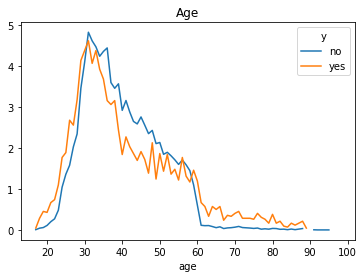

In [ ]:
tmp = train[['age', 'y']].groupby(['age', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'age', 'y')

tmp['no']  = (tmp['no'] / y_no) * 100
tmp['yes'] = (tmp['yes'] / y_yes) * 100

tmp.plot.line()
plt.title('Age')
plt.show()

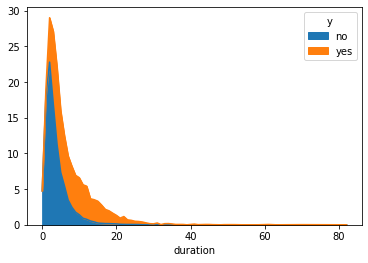

In [ ]:
import math
import numpy as np

tmp = train[['duration', 'y']].copy()
tmp['duration'] = np.round(tmp['duration'] / 60, 0)
tmp = tmp.groupby(['duration', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'duration', 'y')

tmp['no']  = (tmp['no'] / y_no) * 100
tmp['yes'] = (tmp['yes'] / y_yes) * 100

tmp.plot.area()
plt.show()

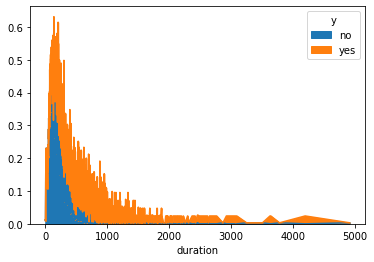

In [ ]:
tmp = train[['duration', 'y']].groupby(['duration', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'duration', 'y')

tmp['no']  = (tmp['no'] / y_no) * 100
tmp['yes'] = (tmp['yes'] / y_yes) * 100

tmp.plot.area()
plt.show()

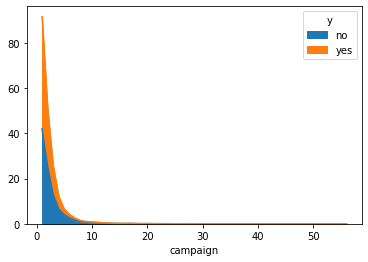

In [ ]:
tmp = train[['campaign', 'y']]
tmp = tmp.groupby(['campaign', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'campaign', 'y')

tmp['no']  = (tmp['no'] / y_no) * 100
tmp['yes'] = (tmp['yes'] / y_yes) * 100

tmp.plot.area()
plt.show()

In [ ]:
tmp = train[['pdays', 'y']]
tmp = tmp.groupby('pdays').size().reset_index(name='count')
tmp['per'] = (tmp['count'] / (y_yes + y_no)) * 100
tmp

,pdays,count,per
0,0,12,0.032372
1,1,23,0.062046
2,2,55,0.148372
3,3,394,1.062883
4,4,106,0.285953
5,5,42,0.113302
6,6,372,1.003534
7,7,54,0.145674
8,8,16,0.043163
9,9,56,0.151070


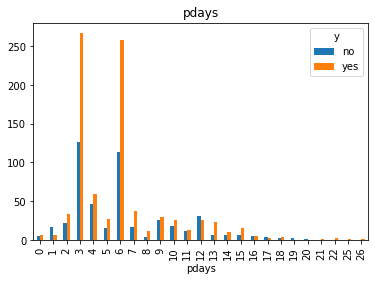

In [ ]:
tmp = train[['pdays', 'y']]
tmp  = tmp[ tmp['pdays'] != 999 ]
tmp = tmp.groupby(['pdays', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'pdays', 'y')
tmp.plot.bar()
plt.show()

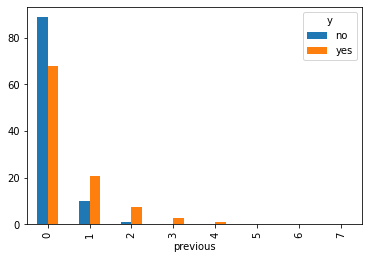

In [ ]:
tmp = train[['previous', 'y']]
tmp = tmp.groupby(['previous', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'previous', 'y')

tmp['no']  = (tmp['no'] / y_no) * 100
tmp['yes'] = (tmp['yes'] / y_yes) * 100

tmp.plot.bar()
plt.show()

## Plots Categorical


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
tmp = train[['y']].groupby('y').size().reset_index(name='count')

y_no  = tmp[ tmp['y'] == 'no' ]['count'][0]
y_yes = tmp[ tmp['y'] == 'yes' ]['count'][1]
y_no, y_yes

(32891, 4178)

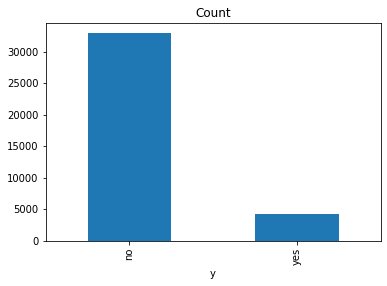

In [ ]:
tmp = train[['y']]
tmp = tmp.groupby('y').size().reset_index(name='count')
tmp.plot.bar(title='Count', y='count', x='y', legend=False)
plt.show()

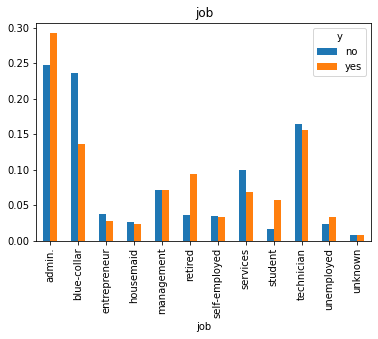

In [ ]:
tmp = train[['job', 'y']]
tmp = tmp.groupby(['job', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'job', 'y')

tmp['no'] = tmp['no'] / y_no
tmp['yes'] = tmp['yes'] / y_yes

tmp.plot.bar()
plt.title('job')
plt.show()

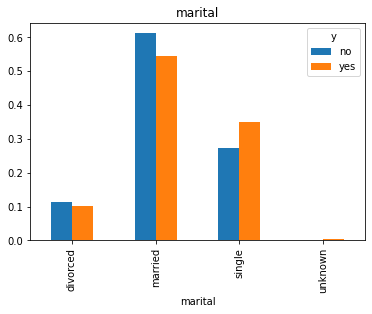

In [ ]:
tmp = train[['marital', 'y']]
tmp = tmp.groupby(['marital', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'marital', 'y')

tmp['no'] = tmp['no'] / y_no
tmp['yes'] = tmp['yes'] / y_yes

tmp.plot.bar()
plt.title('marital')
plt.show()

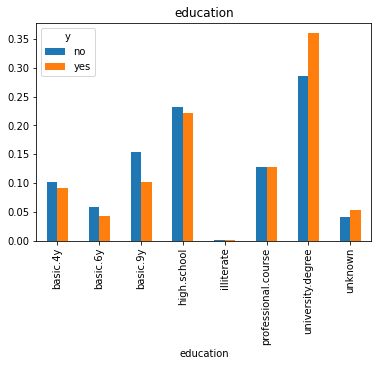

In [ ]:
tmp = train[['education', 'y']]
tmp = tmp.groupby(['education', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'education', 'y')

tmp['no'] = tmp['no'] / y_no
tmp['yes'] = tmp['yes'] / y_yes

tmp.plot.bar()
plt.title('education')
plt.show()

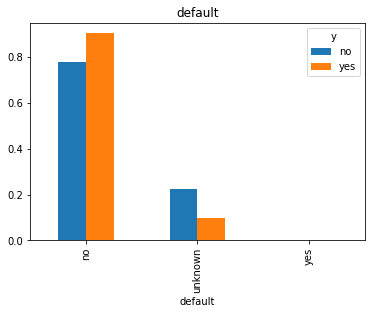

In [ ]:
tmp = train[['default', 'y']]
tmp = tmp.groupby(['default', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'default', 'y')

tmp['no'] = tmp['no'] / y_no
tmp['yes'] = tmp['yes'] / y_yes

tmp.plot.bar()
plt.title('default')
plt.show()

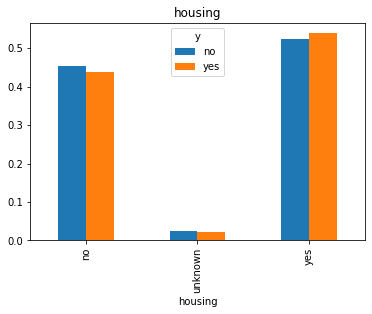

In [ ]:
tmp = train[['housing', 'y']]
tmp = tmp.groupby(['housing', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'housing', 'y')

tmp['no'] = tmp['no'] / y_no
tmp['yes'] = tmp['yes'] / y_yes

tmp.plot.bar()
plt.title('housing')
plt.show()

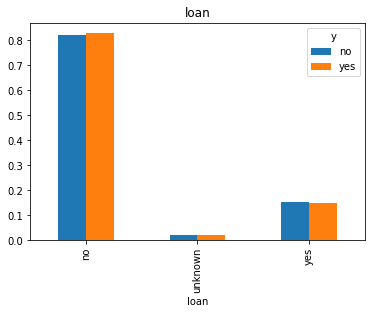

In [ ]:
tmp = train[['loan', 'y']]
tmp = tmp.groupby(['loan', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'loan', 'y')

tmp['no'] = tmp['no'] / y_no
tmp['yes'] = tmp['yes'] / y_yes

tmp.plot.bar()
plt.title('loan')
plt.show()

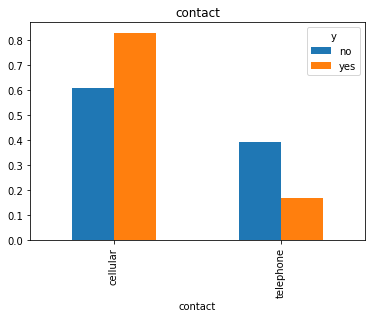

In [ ]:
tmp = train[['contact', 'y']]
tmp = tmp.groupby(['contact', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'contact', 'y')

tmp['no'] = tmp['no'] / y_no
tmp['yes'] = tmp['yes'] / y_yes

tmp.plot.bar()
plt.title('contact')
plt.show()

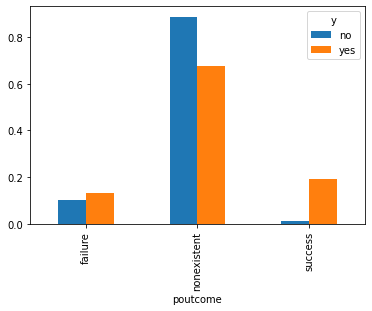

In [ ]:
tmp = train[['poutcome', 'y']]
tmp = tmp.groupby(['poutcome', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'poutcome', 'y')

tmp['no'] = tmp['no'] / y_no
tmp['yes'] = tmp['yes'] / y_yes

tmp.plot.bar()
plt.show()

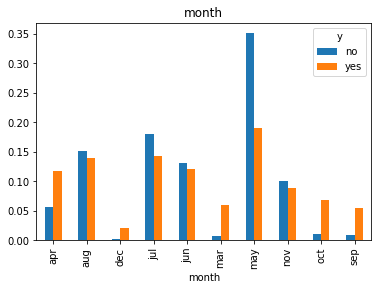

In [ ]:
tmp = train[['month', 'y']]
tmp = tmp.groupby(['month', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'month', 'y')

tmp['no'] = tmp['no'] / y_no
tmp['yes'] = tmp['yes'] / y_yes

tmp.plot.bar()
plt.title('month')
plt.show()

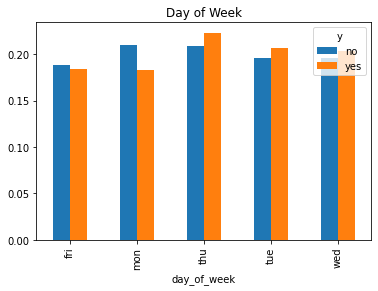

In [ ]:
tmp = train[['day_of_week', 'y']]
tmp = tmp.groupby(['day_of_week', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'day_of_week', 'y')

tmp['no'] = tmp['no'] / y_no
tmp['yes'] = tmp['yes'] / y_yes

tmp.plot.bar()
plt.title('Day of Week')
plt.show()

## Statistical Test

In [ ]:
import numpy as np

train['y_value'] = np.where(train['y'] == 'yes', 1, 0)

In [ ]:
train[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_value']].corr(method='spearman')['y_value'].sort_values()

pdays            -0.324072
nr.employed      -0.282612
euribor3m        -0.266122
emp.var.rate     -0.247264
cons.price.idx   -0.124399
campaign         -0.062551
age              -0.011559
cons.conf.idx     0.042687
previous          0.200786
duration          0.349059
y_value           1.000000
Name: y_value, dtype: float64

In [ ]:
train[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'y_value']].corr(method='spearman')['y_value'].sort_values()

pdays            -0.324072
nr.employed      -0.282612
euribor3m        -0.266122
emp.var.rate     -0.247264
cons.price.idx   -0.124399
campaign         -0.062551
age              -0.011559
cons.conf.idx     0.042687
previous          0.200786
duration_min      0.348788
duration          0.349059
y_value           1.000000
Name: y_value, dtype: float64

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def add_chi2(data, df, column):
  # https://predictivehacks.com/how-to-run-chi-square-test-in-python/
  contigency = pd.crosstab(df[column], df['y'])
  chi2, pvalue, dof, expected = chi2_contingency(contigency)
  data['var'].append(column)
  data['chi2'].append(chi2)
  data['pvalue'].append(pvalue)

In [ ]:
data = { 'var':[], 'chi2':[], 'pvalue':[] }

add_chi2(data, train, 'job')
add_chi2(data, train, 'marital')
add_chi2(data, train, 'education')
add_chi2(data, train, 'default')
add_chi2(data, train, 'housing')
add_chi2(data, train, 'loan')
add_chi2(data, train, 'contact')
add_chi2(data, train, 'month')
add_chi2(data, train, 'day_of_week')
add_chi2(data, train, 'poutcome')

pd.DataFrame(data).sort_values('chi2')

,var,chi2,pvalue
5,loan,0.690517,7.080374e-01
4,housing,3.432699,1.797210e-01
8,day_of_week,20.704379,3.623938e-04
1,marital,115.784670,6.239466e-25
2,education,170.645084,1.835417e-33
3,default,362.164631,2.274834e-79
6,contact,784.006809,1.619245e-172
0,job,827.062169,2.923493e-170
7,month,2845.445152,0.000000e+00
9,poutcome,3781.157734,0.000000e+00


# 3.- Data Processing

Findings:
* The variable pdays have the value of 999 for 96% of the cases, so it will be removed.
* Change target to boolean 1/0
* Change marital to married 1/0
* Change education to education_level (numeric)
* Change default to default_no 1/0
* Change housing to housing_yes 1/0
* Change loan to loan_no 1/0
* Change contact to contact_cellphone 1/0
* Change month to numeric
* Change day of week to numeric
* Change job to numeric order by the counter of yes



In [ ]:
import pandas as pd

train = pd.read_csv('bank_train.csv')

In [ ]:
def switch_education(edu):
  if edu == 'illiterate':
    return 1
  elif edu == 'basic.4y':
    return 2
  elif edu == 'basic.6y':
    return 3
  elif edu == 'basic.9y':
    return 4
  elif edu == 'high.school':
    return 5
  elif edu == 'professional.course':
    return 6
  elif edu == 'university.degree':
    return 7
  return 0

def switch_wday(day):
  if day == 'mon':
    return 1
  elif day == 'tue':
    return 2
  elif day == 'wed':
    return 3
  elif day == 'thu':
    return 4
  elif day == 'fri':
    return 5
  return 0

def switch_month(month):
  if month == 'jan':
    return 1
  elif month == 'feb':
    return 2
  elif month == 'mar':
    return 3
  elif month == 'apr':
    return 4
  elif month == 'may':
    return 5
  elif month == 'jun':
    return 6
  elif month == 'jul':
    return 7
  elif month == 'aug':
    return 8
  elif month == 'sep':
    return 9
  elif month == 'oct':
    return 10
  elif month == 'nov':
    return 11
  elif month == 'dec':
    return 12
  return 0

def switch_job(job):
  if job == 'housemaid':
    return 1
  elif job == 'entrepreneur':
    return 2
  elif job == 'unemployed':
    return 3
  elif job == 'self-employed':
    return 4
  elif job == 'student':
    return 5
  elif job == 'services':
    return 6
  elif job == 'management':
    return 7
  elif job == 'retired':
    return 8
  elif job == 'blue-collar':
    return 9
  elif job == 'technician':
    return 10
  elif job == 'admin.':
    return 11
  return 0

In [ ]:
import numpy as np
import pandas as pd

def data_processing(df):
  df['y']            = np.where(df['y'] == 'yes', 1, 0)
  df['job']          = df.apply(lambda x: switch_job(x.job), axis=1)
  df['married']      = np.where(df['marital'] == 'married', 1, 0)
  df['education']    = df.apply(lambda x: switch_education(x.education), axis=1)
  df['default_no']   = np.where(df['default'] == 'no', 1, 0)
  df['housing_yes']  = np.where(df['housing'] == 'yes', 1, 0)
  df['loan_no']      = np.where(df['loan'] == 'no', 1, 0)
  df['by_cellphone'] = np.where(df['contact'] == 'cellular', 1, 0)
  df['day_of_week']  = df.apply(lambda x: switch_wday(x.day_of_week), axis=1)
  df['month']        = df.apply(lambda x: switch_month(x.month), axis=1)
  df['poutcome']     = np.where(df['poutcome'] != 'nonexistent', 1, 0)

  df = df[ ['age', 'job', 'married', 'education', 'default_no', 'housing_yes', 'loan_no', 'by_cellphone', 'month',
            'day_of_week', 'duration', 'campaign', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
            'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'] ]
  return df

In [ ]:
train = data_processing(train)
train.head()

,age,job,married,education,default_no,housing_yes,loan_no,by_cellphone,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,36,11,0,5,1,1,0,1,5,4,127,1,0,0,-1.8,92.893,-46.2,1.327,5099.1,0
1,47,2,1,7,1,1,1,0,6,1,82,2,0,0,1.4,94.465,-41.8,4.961,5228.1,0
2,30,10,0,6,1,1,0,1,8,5,22,13,0,0,1.4,93.444,-36.1,4.964,5228.1,0
3,57,8,1,2,0,0,1,0,6,3,74,1,0,0,1.4,94.465,-41.8,4.959,5228.1,0
4,44,9,1,2,0,0,1,0,6,1,299,5,0,0,1.4,94.465,-41.8,4.961,5228.1,0


## Experiment

In [ ]:
import math
import numpy as np

tmp = train[['duration', 'y']].copy()
tmp['duration'] = np.round(tmp['duration'] / 60, 0)
tmp = tmp.groupby(['duration', 'y']).size().reset_index(name='count')
tmp = tmp.pivot_table('count', 'duration', 'y')

tmp['no']  = (tmp['no'] / y_no) * 100
tmp['yes'] = (tmp['yes'] / y_yes) * 100

tmp.plot.area()
plt.show()

## Feature Selection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression

In [ ]:
y = train.pop('y').values
X = train.values
X.shape, y.shape

((37069, 19), (37069,))

In [ ]:
selector = SelectFromModel(LogisticRegression(penalty='l1', C=0.01, solver='liblinear'), max_features=X.shape[1])
selector.fit(X, y)
selector.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


array([ True, False,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [ ]:
flasso = train.columns[selector.get_support()], len(train.columns[selector.get_support()])
flasso = flasso[0]
flasso

Index(['age', 'married', 'education', 'default_no', 'by_cellphone', 'month',
       'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

---

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

In [ ]:
fremove = train.columns
fremove = fremove.difference(flasso)
fremove

Index(['day_of_week', 'housing_yes', 'job', 'loan_no', 'poutcome'], dtype='object')

In [ ]:
auc = []

for i in range(0, len(fremove) + 1):
  tmp = fremove[0:i]
  tmp = flasso.union(tmp)
  X   = train[tmp].values

  model = LogisticRegression(random_state=0, max_iter=1500)
  crossval = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
  auc.append( crossval.mean() )
  print(crossval.mean())

0.9189099659679758
0.9189057827649295
0.9190485771507308
0.9190417900490617
0.9192666074199188
0.9191934353332207


In [ ]:
fremove = ['LASSO'] + list(fremove)
fremove

['LASSO', 'day_of_week', 'housing_yes', 'job', 'loan_no', 'poutcome']

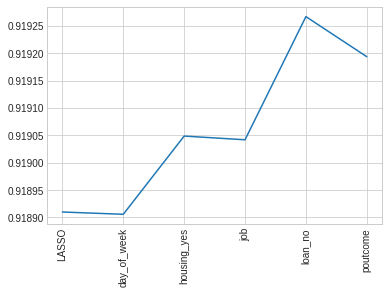

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()
plt.xticks(rotation=90)
ax.plot(fremove, auc);

In [ ]:
def data_processing_final(df):
  df = data_processing(df)
  df = df[ ['age', 'married', 'education', 'default_no', 'by_cellphone',
            'month', 'duration', 'campaign', 'previous', 'emp.var.rate',
            'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'] ]
  return df

# 4.- Modeling

In [ ]:
import pandas as pd

train = pd.read_csv('bank_train.csv')
train = data_processing_final(train)

In [ ]:
y = train.pop('y').values
X = train.values
X.shape, y.shape

((37069, 14), (37069,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

def add_model(name, model):
  model = model.fit(X, y)

  data['name'].append(name)
  data['model'].append(model)
  data['score'].append(model.score(X, y))

In [ ]:
data = { 'name':[], 'model':[], 'score':[], 'accuracy':[], 'auc':[] }

add_model('LogisticRegression', LogisticRegression(random_state=0, max_iter=1500))
add_model('DecisionTreeClassifier', DecisionTreeClassifier(random_state=0, max_depth=5))
add_model('RandomForestClassifier', RandomForestClassifier(random_state=0, max_depth=15))
add_model('SVM', SVC())
add_model('NeuralNetwork', MLPClassifier(random_state=1, max_iter=300))

In [ ]:
data

{'name': ['LogisticRegression',
  'DecisionTreeClassifier',
  'RandomForestClassifier',
  'SVM',
  'NeuralNetwork'],
 'model': [LogisticRegression(max_iter=1500, random_state=0),
  DecisionTreeClassifier(max_depth=5, random_state=0),
  RandomForestClassifier(max_depth=15, random_state=0),
  SVC(),
  MLPClassifier(max_iter=300, random_state=1)],
 'score': [0.9080633413364266,
  0.9154549623674769,
  0.980091181310529,
  0.8905824273651839,
  0.8353880601041301],
 'accuracy': [],
 'auc': []}

# 5.- Comparison

In [ ]:
import pandas as pd

test = pd.read_csv('bank_test.csv')
test = data_processing_final(test)

In [ ]:
y_test = test.pop('y').values
X_test = test.values
X_test.shape, y_test.shape

((4119, 14), (4119,))

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

for model in data['model']:
  y_pred = model.predict(X_test)
  val = accuracy_score(y_test, y_pred)
  data['accuracy'].append( val )

  val = roc_auc_score(y_test, y_pred)
  data['auc'].append( val )

In [ ]:
tmp = pd.DataFrame(data).sort_values('auc', ascending=False)
tmp = tmp[ ['name', 'accuracy', 'auc'] ]
tmp

,name,accuracy,auc
4,NeuralNetwork,0.833455,0.832456
1,DecisionTreeClassifier,0.910415,0.744369
2,RandomForestClassifier,0.908958,0.734094
0,LogisticRegression,0.901675,0.659078
3,SVM,0.889779,0.526623


In [ ]:
tmp = pd.DataFrame(data).sort_values('auc', ascending=False)
tmp = tmp[ ['name', 'accuracy', 'auc'] ]
tmp

,name,accuracy,auc
1,DecisionTreeClassifier,0.910415,0.744369
2,RandomForestClassifier,0.911872,0.736680
0,LogisticRegression,0.900461,0.654612
4,NeuralNetwork,0.895363,0.627157
3,SVM,0.889779,0.526623


In [ ]:
tmp.to_csv('results.csv', index=False)

In [ ]:
from google.colab import files
files.download('results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Test

In [ ]:
m = MLPClassifier(random_state=1, max_iter=2000, hidden_layer_sizes=(100,100))
# MLPClassifier(random_state=1, max_iter=300)

In [ ]:
m = m.fit(X, y)

In [ ]:
y_pred = m.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred)

(0.8929351784413693, 0.5482565014968624)